# Dask DataFrame

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

In [49]:
from dask.diagnostics import ProgressBar

In [6]:
from dask.distributed import Client

## Лабораторная работа 13

__При решении данных задач не подразумевается использования циклов или генераторов Python в ходе работы с пакетами `numpy`, `pandas` и `dask`, если в задании не сказано обратного. Решения задач, в которых для обработки массивов `numpy`, структур `pandas` или структур `dask` используются явные циклы (без согласования с преподавателем), могут быть признаны некорректными и не засчитаны.__

В ходе выполнения все операции вычислений проводятся над `dask.DataFrame` и средствами пакета `dask`, если в задании не сказано обратного. Переход от `dask.DataFrame` к `pd.DataFrame` возможен исключительно для демонстрации результата в конце решения задачи. Если в задаче используются результаты выполнения предыдущих задач, то подразумевается, что вы используете результаты в виде `dask.DataFrame` (то есть то, что было получено до вызова `compute`, а не после).

1\. В архиве `recipes_full.zip` находятся файлы, содержащие информацию об рецептах блюд. Загрузите данные из файлов этого архива в виде `dd.DataFrame` с названием `recipes`. Укажите, что в столбце `submitted` содержатся даты. Выведите на экран информацию о количестве сегментов и типе столбцов. Выведите на экран 5 первых и 5 последних строк таблицы. В случае сообщения об ошибке объясните причину и исправьте ошибку.

In [1]:
import dask.dataframe as dd

In [2]:
recipes = dd.read_csv('/Users/nastya/Desktop/Университет/Tobd/13_dask_dataframe/recipes_full/recipes_full_*.csv',
                     assume_missing=True)

In [23]:
recipes.head()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,683970.0,vant ivoire mickies nothing,33.0,803776.0,2019-08-22,4.0,pat and gina neely and their family own and op...,9.0
1,1089012.0,kremsils mariposa baccala cookies class borage...,23.0,51579.0,2013-03-02,1.0,"a light, tasty and easy to put together chicke...",5.0
2,1428572.0,tania lander,0.0,68884.0,1980-11-09,1.0,a delicious melt in your mouth appetizer. for ...,5.0
3,1400250.0,heloise milli asher doogh zojirushi,24.0,678862.0,2018-04-29,3.0,delicious cream cheese and peach filled cresce...,1.0
4,387709.0,nutty chocolate chunk cookies,47.0,489552.0,2009-08-31,8.0,everyone loves these buttery cookies chock ful...,10.0


In [12]:
recipes['submitted'] = dd.to_datetime(recipes['submitted'])

In [25]:
recipes.dtypes

id                       float64
name                      object
minutes                  float64
contributor_id           float64
submitted         datetime64[ns]
n_steps                  float64
description               object
n_ingredients            float64
dtype: object

In [26]:
recipes.npartitions

8

In [27]:
recipes.tail(5)

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
278949,1029131.0,tuti waffle snackies steakhouse,19.0,171345.0,1973-10-18,4.0,"according to a providence journal article, ama...",4.0
278950,1700703.0,noelias cheats crocante fleisch zitumbuwa,1.0,30228.0,2007-07-01,6.0,if possible sauté the onions and garlic in abo...,1.0
278951,1910650.0,rubbed restuffed pelmeni bedouin flavourful,60.0,591905.0,2009-09-26,3.0,another great recipe to add to the growing swe...,2.0
278952,713836.0,stems polpettine peezi,NaN,357389.0,2003-09-30,4.0,adapted from top secret recipes. love this!,9.0
278953,660699.0,clementines,64.0,29196.0,1973-06-03,6.0,this would make a great start to your holiday ...,8.0


2\. Выведите на экран следующую информацию:
* количество сегментов в таблице
* объем используемой памяти каждого сегмента
* количество строк в каждом сегменте
* количество строк во всей таблице.

In [28]:
recipes.npartitions

8

In [32]:
recipes.memory_usage().compute()

Index                 1024
contributor_id    17853096
description       17853096
id                17853096
minutes           17853096
n_ingredients     17853096
n_steps           17853096
name              17853096
submitted         17853096
dtype: int64

In [34]:
recipes.info

<bound method DataFrame.info of Dask DataFrame Structure:
                    id    name  minutes contributor_id       submitted  n_steps description n_ingredients
npartitions=8                                                                                            
               float64  object  float64        float64  datetime64[ns]  float64      object       float64
                   ...     ...      ...            ...             ...      ...         ...           ...
...                ...     ...      ...            ...             ...      ...         ...           ...
                   ...     ...      ...            ...             ...      ...         ...           ...
                   ...     ...      ...            ...             ...      ...         ...           ...
Dask Name: assign, 4 graph layers>

In [122]:
recipes.shape[0].compute()

2231637

In [74]:
[part.shape[0].compute() for part in recipes.partitions]

[278955, 278955, 278955, 278955, 278955, 278954, 278954, 278954]

In [79]:
[part.memory_usage().sum().compute() for part in recipes.partitions]

[17853248,
 17853248,
 17853248,
 17853248,
 17853248,
 17853184,
 17853184,
 17853184]

3\. В архиве `recipes_additional.zip` находятся файлы, содержащие информацию об рецептах блюд, полученные из другого источника. В связи с этим названия и количество столбцов в этих данных отличаются от того, что находится в архиве `recipes_full.zip`.

Объедините два набора набора данных, согласовав названия столбцов и форматы данных. Добавьте столбец с информацией о том, из какого датасета была получены данные.

In [3]:
recipes_additional = dd.read_csv(
    '/Users/nastya/Desktop/Университет/Tobd/13_dask_dataframe/recipes_additional/recipes_additional_*.csv',
     assume_missing=True)

In [131]:
recipes_additional.head()

,name,description,hours,date_of_publication,#tags,#ingredients,recipe_id,views_30_days
0,blue cheese tenders,found this recipe in my mom's older recipes. ...,0.333333,01/02/2008,12.0,5.0,52604,2001.0
1,hindi frappes tikkis siro changling anya jerkll,this is one i found on a post-it in my kitchen...,0.550000,25/06/1983,13.0,3.0,1ef55e,4691.0
2,navratan padma beehoon contest carrot,ok...here in the us avocados are used in savor...,0.433333,19/12/2007,9.0,5.0,6ccf2,3823.0
3,camptown two hurry laddi,i got this out of southern living magazine and...,0.133333,06/11/1998,3.0,4.0,6bb49,3202.0
4,down on the farm sausage bake,definite comfort food for me and my family.,1.250000,16/10/2002,5.0,13.0,dd23,2143.0


In [87]:
recipes.head()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,683970.0,vant ivoire mickies nothing,33.0,803776.0,2019-08-22,4.0,pat and gina neely and their family own and op...,9.0
1,1089012.0,kremsils mariposa baccala cookies class borage...,23.0,51579.0,2013-03-02,1.0,"a light, tasty and easy to put together chicke...",5.0
2,1428572.0,tania lander,0.0,68884.0,1980-11-09,1.0,a delicious melt in your mouth appetizer. for ...,5.0
3,1400250.0,heloise milli asher doogh zojirushi,24.0,678862.0,2018-04-29,3.0,delicious cream cheese and peach filled cresce...,1.0
4,387709.0,nutty chocolate chunk cookies,47.0,489552.0,2009-08-31,8.0,everyone loves these buttery cookies chock ful...,10.0


In [4]:
def to_16(row):
    return int(row, 16)

In [5]:
recipes_additional.recipe_id = recipes_additional.recipe_id.astype(str).map(to_16, meta = ('str', 'int'))

In [6]:
recipes_additional.hours = (recipes_additional.hours * 60)

In [7]:
recipes_additional.date_of_publication = dd.to_datetime(recipes_additional['date_of_publication'],
                                          format='%d/%m/%Y')

In [8]:
recipes_additional = recipes_additional.rename(columns = {'hours': 'minutes',
                                    'recipe_id': 'id',
                                    'date_of_publication': 'submitted'})

In [9]:
recipes_additional = recipes_additional.rename(columns = {'#ingredients': 'n_ingredients'})

In [10]:
recipes_additional = recipes_additional.rename(columns = {'#tags': 'tags'})

In [154]:
recipes_additional.head()

,name,description,minutes,submitted,tags,n_ingredients,id,views_30_days
0,blue cheese tenders,found this recipe in my mom's older recipes. ...,20.0,2008-02-01,12.0,5.0,337412,2001.0
1,hindi frappes tikkis siro changling anya jerkll,this is one i found on a post-it in my kitchen...,33.0,1983-06-25,13.0,3.0,2028894,4691.0
2,navratan padma beehoon contest carrot,ok...here in the us avocados are used in savor...,26.0,2007-12-19,9.0,5.0,445682,3823.0
3,camptown two hurry laddi,i got this out of southern living magazine and...,8.0,1998-11-06,3.0,4.0,441161,3202.0
4,down on the farm sausage bake,definite comfort food for me and my family.,75.0,2002-10-16,5.0,13.0,56611,2143.0


In [11]:
dd.concat([recipes, recipes_additional]).head()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients,tags,views_30_days
0,683970.0,vant ivoire mickies nothing,33.0,803776.0,2019-08-22,4.0,pat and gina neely and their family own and op...,9.0,NaN,NaN
1,1089012.0,kremsils mariposa baccala cookies class borage...,23.0,51579.0,2013-03-02,1.0,"a light, tasty and easy to put together chicke...",5.0,NaN,NaN
2,1428572.0,tania lander,0.0,68884.0,1980-11-09,1.0,a delicious melt in your mouth appetizer. for ...,5.0,NaN,NaN
3,1400250.0,heloise milli asher doogh zojirushi,24.0,678862.0,2018-04-29,3.0,delicious cream cheese and peach filled cresce...,1.0,NaN,NaN
4,387709.0,nutty chocolate chunk cookies,47.0,489552.0,2009-08-31,8.0,everyone loves these buttery cookies chock ful...,10.0,NaN,NaN


In [157]:
dd.concat([recipes, recipes_additional]).tail()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients,tags,views_30_days
325814,2157279.0,plas hachis,35.0,NaN,1997-06-29,NaN,"if you like the sound of this, you are gonna l...",1.0,5.0,667.0
325815,1364184.0,stephen jackpot guatemalan bredie cocoatana ma...,42.0,NaN,1981-09-16,NaN,a cool and creamy dessert!,9.0,10.0,2269.0
325816,1836840.0,derves camp schmere krbissuppe fldekager,15.0,NaN,1999-01-22,NaN,quick and easy. tasty alternative to tradition...,4.0,5.0,681.0
325817,963880.0,texans zuring mumble limas bouclair besan duvall,59.0,NaN,1973-02-07,NaN,5-ingredient fix contest entry. tasty little ...,5.0,9.0,3683.0
325818,448339.0,voi buying soutzoukakia mona biskvi uukkous tr...,52.0,NaN,2009-08-16,NaN,this sounds tasty and quick and easy to make. ...,9.0,2.0,1244.0


In [12]:
concat_recipes = dd.concat([recipes, recipes_additional])

4\. Выясните, сколько рецептов содержат слово `chocolate`. Выведите на экран набор уникальных идентификаторов авторов таких рецептов.

In [13]:
chocolate = concat_recipes.name + ' ' + concat_recipes.description

In [168]:
chocolate.str.contains('chocolate').sum().compute()

126867

5\. При помощи функции `da.histogram` посчитайте значения для построения гистограммы для столбца `n_ingredients`. Визуализируйте полученные результаты при помощи функции `plt.bar`. Добавьте на рисунок 2 вертикальные линии, соответствующие квантилям уровней 0.25 и 0.75. Сделайте масштаб вертикальной оси логарифмическим.

Допускается вычисление статистики по столбцу (применение метода `compute`) до того, как будет вызван `da.histogram`. 

In [169]:
concat_recipes.n_ingredients.head()

0     9.0
1     5.0
2     5.0
3     1.0
4    10.0
Name: n_ingredients, dtype: float64

In [14]:
import dask.array as da

In [175]:
import numpy as np

In [181]:
h, bins = da.histogram(concat_recipes.n_ingredients, 
             bins = 10,
             range = [concat_recipes['n_ingredients'].min(), concat_recipes['n_ingredients'].max()])

In [184]:
h.compute()

array([1991799, 1704280,  118051,   36828,    7851,    1636,     226,
            42,      13,       6])

In [185]:
bins.compute()

array([ 1. ,  5.2,  9.4, 13.6, 17.8, 22. , 26.2, 30.4, 34.6, 38.8, 43. ])

In [188]:
import matplotlib.pyplot as plt

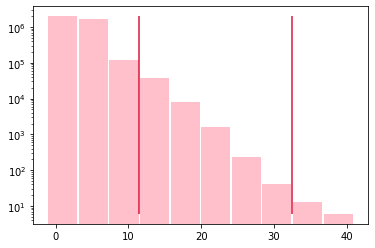

In [195]:
plt.bar(bins.compute()[:-1], h.compute(), width = 4, color = 'pink')

plt.vlines(dd.from_array(bins).quantile([0.25, 0.75]).compute(), 
           dask.compute(h.min()), dask.compute(h.max()), colors = 'crimson')

plt.yscale('log')

plt.show()

6\. Постройте сводную таблицу при помощи метода `pivot_table`, где по строкам располагаются года, по столбцам - названия месяцев, а в ячейках содержится средняя длина рецептов в данный год и месяц.

In [218]:
concat_recipes['year'] = concat_recipes.submitted.dt.year

In [220]:
concat_recipes['month'] = concat_recipes.submitted.dt.month_name()

In [221]:
concat_recipes.head()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients,tags,views_30_days,year,month
0,683970.0,vant ivoire mickies nothing,33.0,803776.0,2019-08-22,4.0,pat and gina neely and their family own and op...,9.0,NaN,NaN,2019,August
1,1089012.0,kremsils mariposa baccala cookies class borage...,23.0,51579.0,2013-03-02,1.0,"a light, tasty and easy to put together chicke...",5.0,NaN,NaN,2013,March
2,1428572.0,tania lander,0.0,68884.0,1980-11-09,1.0,a delicious melt in your mouth appetizer. for ...,5.0,NaN,NaN,1980,November
3,1400250.0,heloise milli asher doogh zojirushi,24.0,678862.0,2018-04-29,3.0,delicious cream cheese and peach filled cresce...,1.0,NaN,NaN,2018,April
4,387709.0,nutty chocolate chunk cookies,47.0,489552.0,2009-08-31,8.0,everyone loves these buttery cookies chock ful...,10.0,NaN,NaN,2009,August


In [223]:
concat_recipes = concat_recipes.categorize(columns=['month'])

In [225]:
concat_recipes.pivot_table(
        values = 'minutes',
        index = 'year',
        columns = 'month'
).compute()

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1970,32.266071,32.609534,31.920839,31.777888,32.018480,32.391618,32.680379,31.530324,32.163865,32.259717,31.861603,32.150206
1971,32.729163,31.634830,32.491963,31.915076,31.915618,32.640189,32.214741,32.210144,31.695938,31.755951,32.423644,32.887150
1972,31.920396,32.456234,32.429032,31.613900,31.555752,32.469562,31.697105,32.511084,32.394866,32.647152,32.127801,32.337815
1973,31.861614,32.794690,32.577168,32.178682,32.454803,31.609522,32.005497,31.835360,31.977167,32.127593,32.046250,31.694434
1974,32.370490,31.441075,32.155584,32.209961,32.020948,32.458685,31.848056,32.362872,32.365350,32.161748,32.286992,32.029580
1975,31.941241,31.903727,31.978817,31.888802,32.530528,32.153213,31.993961,32.486968,31.867243,32.347348,31.647519,32.786535
1976,32.506080,31.989581,31.846194,32.111029,32.858222,32.285435,31.638561,32.332730,32.025449,31.789815,32.372563,32.497422
1977,32.134427,32.021403,32.355087,32.255344,31.706885,32.446422,32.331480,31.734753,31.892876,32.040007,31.671168,31.658180
1978,32.060018,32.378282,32.251056,31.847617,32.144593,32.252275,32.116167,31.541312,31.972901,31.988300,32.738524,32.746239


7\. Удалите строки, которые содержат пропуске в столбце `contributor_id` и приведите его тип к целочисленному. Для каждого `contributor_id` найдите топ-5 слов, которых этот пользователь наиболее часто использовал в названиях своих рецептов. Выведите на экран статистику для пользователя с ID 1530.

In [17]:
concat_recipes_cid = concat_recipes.dropna(subset = ['contributor_id'])

In [19]:
concat_recipes_cid['name'] = concat_recipes_cid.name.fillna('').astype('str')

In [20]:
concat_recipes_cid['contributor_id'] = concat_recipes_cid.contributor_id.astype('int')

In [37]:
concat_recipes_cid.head()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients,tags,views_30_days
0,683970.0,vant ivoire mickies nothing,33.0,803776,2019-08-22,4.0,pat and gina neely and their family own and op...,9.0,NaN,NaN
1,1089012.0,kremsils mariposa baccala cookies class borage...,23.0,51579,2013-03-02,1.0,"a light, tasty and easy to put together chicke...",5.0,NaN,NaN
2,1428572.0,tania lander,0.0,68884,1980-11-09,1.0,a delicious melt in your mouth appetizer. for ...,5.0,NaN,NaN
3,1400250.0,heloise milli asher doogh zojirushi,24.0,678862,2018-04-29,3.0,delicious cream cheese and peach filled cresce...,1.0,NaN,NaN
4,387709.0,nutty chocolate chunk cookies,47.0,489552,2009-08-31,8.0,everyone loves these buttery cookies chock ful...,10.0,NaN,NaN


In [21]:
concat_recipes_cid = concat_recipes_cid.groupby('contributor_id')['name'].apply(
    lambda x: x.map(str.split).explode().value_counts()[:5]
)

/var/folders/0f/kzrl9rx52273k8v4glcycjv80000gn/T/ipykernel_9754/1553498636.py:1: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  concat_recipes_cid = concat_recipes_cid.groupby('contributor_id')['name'].apply(


In [23]:
concat_recipes_cid.loc[1530].compute()

contributor_id           
1530            chocolate    7
                muffins      6
                bread        5
                and          4
                cream        3
Name: name, dtype: int64

In [5]:
from dask.distributed import Client

In [6]:
client = Client()

In [7]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 8.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:54854,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 8.00 GiB
Comm: tcp://127.0.0.1:54865,Total threads: 2
Dashboard: http://127.0.0.1:54869/status,Memory: 2.00 GiB
Nanny: tcp://127.0.0.1:54858,


8\. В файлах архива `site_logs.zip` находятся логи системы. Считайте эти логи в виде `dask.bag`, выделите их них дату, время, id службы, уровень лога и сообщение. Объедините дату и время в одну строку. Преобразуйте `dask.bag` в `dask.dataframe`, предварительно оставив только логи уровня "INFO". Подтвердите корректность решения, выведя на экран уникальные значения столбца `level` полученной таблицы.

```
date(ymd)   time(HMS)   service_id level   msg
081110      103041      34         INFO    dfs.FSNamesystem: BLOCK* NameSystem.delete: ...
```

In [1]:
import dask.bag as db

In [2]:
logs = db.read_text("/Users/nastya/Desktop/Университет/Tobd/13_dask_dataframe/site_logs/logs_a*").map(
    str.split, maxsplit=4)

In [4]:
ddf = logs.filter(lambda x: x[3] == 'INFO').to_dataframe(
    columns=['date', 'time', 'service_id', 'level', 'msg']
).persist()

In [11]:
ddf.head()

,date,time,service_id,level,msg
0,081109,203518,143,INFO,dfs.DataNode$DataXceiver: Receiving block blk_...
1,081109,203518,35,INFO,dfs.FSNamesystem: BLOCK* NameSystem.allocateBl...
2,081109,203519,143,INFO,dfs.DataNode$DataXceiver: Receiving block blk_...
3,081109,203519,145,INFO,dfs.DataNode$DataXceiver: Receiving block blk_...
4,081109,203519,145,INFO,dfs.DataNode$PacketResponder: PacketResponder ...


In [13]:
ddf.level.unique().compute()

0    INFO
Name: level, dtype: object

9\. Добавьте в таблицу из задания 8 столбец `is_delete_op`, который содержит флаг: является ли данная операция удалением чего-либо или нет. Для выяснения этого факта проанализизируйте сообщение лога. 

Для каждого лога подсчитайте, сколько из записанных перед ним последних 100 логов являются операциями удаления. Для вычислений используйте метод `map_overlap`. Посчитайте и выведите на экран, сколько существует подпоследовательностей не менее чем из 75 сообщений, содержащих операции удаления.

In [14]:
import dask

In [9]:
ddf['is_delete_op'] = ddf.msg.str.findall('Deleting').str.len() > 0

In [10]:
ddf['is_delete_op'].map_overlap(lambda s: s.rolling(100).apply(
    lambda ser: ser.sum() == ser.shape[0]), 100, 0
).sum().compute()

1094561.0

10\. Сгруппируйте таблицу с логами по часу, в котором был оставлен лог. Под часом имеется в виду час конкретного дня, то связь связка год-месяц-день-час.  Посчитайте, сколько логов было записано за каждый час. Визуализируйте полученную динамику. Добавьте подписи засечек, подписи осей и название рисунка.

In [11]:
import matplotlib.pyplot as plt

In [16]:
import pandas as pd

In [20]:
pd.DataFrame([[1, 2], [3, 4]]).groupby(0).size().sort_index()

0
1    1
3    1
dtype: int64

In [13]:
ddf['group_minutes'] = dd.to_datetime(ddf['date'] + ' ' + ddf['time'], yearfirst=True).dt.round('T')

In [22]:
kva = ddf.groupby('group_minutes').size().compute()

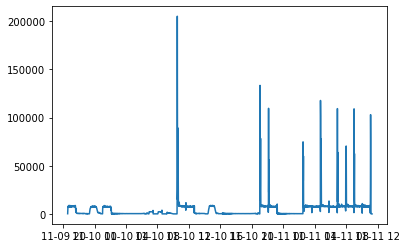

In [24]:
plt.plot(kva.index, kva.to_list())
plt.show()